### Gap statistics

According to statistical folklore the best K is located at the 'elbow' of the clusters inertia while K increases. This heuristic has been translated into a more formalized procedure by the Gap Statistics and in this post we'll see how to pick K in an optimal way using the Gap Statistics. The main idea of the methodology is to compare the clusters inertia on the data to cluster and a reference dataset. The optimal choice of K is given by k for which the gap between the two results is maximum. To illustrate this idea, let’s pick as reference dataset a uniformly distributed set of points and see the result of KMeans increasing K:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs 
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

In [2]:
reference=np.random.rand(100,2)

In [3]:
kmeans=KMeans(n_clusters=3,random_state=11)

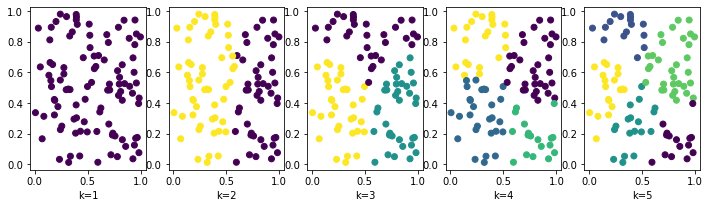

In [4]:
plt.figure(figsize=(12,3))
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    a=kmeans.fit_predict(reference)
    plt.subplot(1,5,k)
    plt.scatter(reference[:, 0], reference[:, 1], c=a)
    plt.xlabel('k='+str(k))

In [5]:
X=make_blobs(n_samples=100,n_features=2,centers=3,cluster_std=.8)[0]

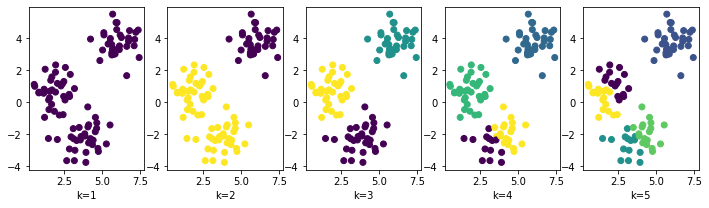

In [6]:
plt.figure(figsize=(12, 3))
for k in range(1,6):
    kmeans = KMeans(n_clusters=k)
    a = kmeans.fit_predict(X)
    plt.subplot(1,5,k)
    plt.scatter(X[:, 0], X[:, 1], c=a)
    plt.xlabel('k='+str(k))

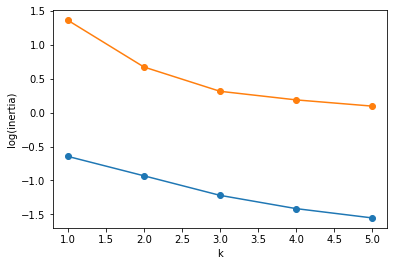

In [7]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 5
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), X, k_max)


plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.show()

Text(0.5, 0, 'k')

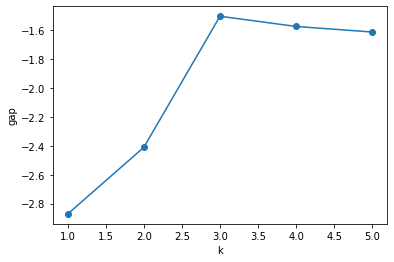

In [84]:
plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')